# Harris Corner Detection
***

In [3]:
# notebook imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

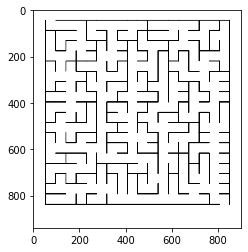

In [102]:
# loading in images
maze = cv2.imread('../../Image_Data/maze.png')
maze = cv2.cvtColor(maze, cv2.COLOR_BGR2RGB)
maze_result = maze.copy()
maze_result_cv = maze.copy()
gray_maze = cv2.cvtColor(maze, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_maze, cmap='gray')

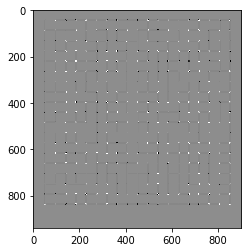

In [103]:
# let's try to implement corner harris from scratch using numpy and other opencv builtins
# 1. convert to grayscale - done
window_func = np.ones((3,3), dtype='uint8')
# getting image derivatives using Sobel operator
sobelx = cv2.Sobel(gray_maze, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobelx2 = sobelx * sobelx
sobelx = cv2.convertScaleAbs(sobelx)
sobelx2 = cv2.convertScaleAbs(sobelx2)

sobely = cv2.Sobel(gray_maze, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
sobely2 = sobely * sobely
sobely = cv2.convertScaleAbs(sobely)
sobely2 = cv2.convertScaleAbs(sobely2)

sobelxy = sobelx * sobely

# setting up resulting r value matrix
rows, cols = gray_maze.shape
R = np.zeros((rows, cols))
results = np.zeros((rows, cols))
k = 0.04
rmax = 0

# getting M sum matrix using computed sobels
# take diagonals only when using change in x, y, so 
# M = np.zeros((2,2))
# plt.imshow(sobely2)
for row in range(rows):
    for col in range(cols):
        M = np.array([[sobelx2[row, col], sobelxy[row, col]], [sobelxy[row, col], sobely2[row, col]]], dtype=np.float64)
        R[row, col] = np.linalg.det(M) - k * (np.power(np.trace(M), 2))
        if R[row, col] > rmax:
            rmax = R[row, col]

            
maze_result[R>0.6*rmax] = [255, 0, 0]
# if a match is above 10% of the max value, then that is a match
# for row in range(1, rows - 1):
#     for col in range(1, cols - 1):
#         maze_result_cv[harris_res>0.01*harris_res.max()] = [255, 0, 0]
#         if (
#             R[row, col] > 0.01*rmax and R[row, col] > R[row-1, col-1] 
#             and R[row, col] > R[row-1, col+1] and R[row, col] > R[row+1, col-1] 
#             and R[row, col] > R[row+1, col+1]
#             and R[row, col] > R[row, col+1]
#             and R[row, col] > R[row+1, col]
#             and R[row, col] > R[row-1, col]
#             and R[row, col] > R[row, col-1]
#         ):
#             cv2.circle(img=maze_result, center=(row, col), radius=2, color=(255, 0, 0), thickness=-1)
            
#             results[row, col] = 255
#          if R[row, col] > 0.9*rmax:
#             cv2.circle(img=maze_result, center=(row, col), radius=2, color=(255, 0, 0), thickness=-1)
            
            
plt.imshow(R, cmap='gray')

54620.999999999956 -67391.43999999997 54620.999999999956


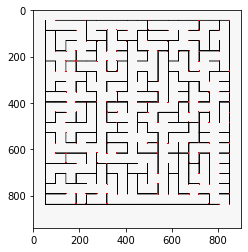

In [101]:
plt.imshow(maze_result)
print(R.max(), R.min(), rmax)

348751550.0 -145310960.0


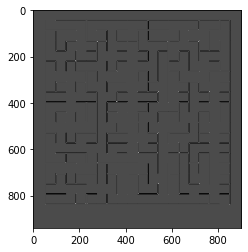

In [90]:
# opencv syntax
gray_maze_cv = np.float32(gray_maze)
harris_res = cv2.cornerHarris(src=gray_maze_cv, blockSize=2, ksize=3, k=0.04)
plt.imshow(harris_res, cmap='gray')
print(harris_res.max(), harris_res.min())

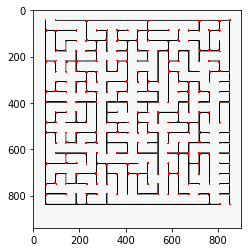

In [69]:
harris_res = cv2.dilate(harris_res, None)
maze_result_cv[harris_res>0.01*harris_res.max()] = [255, 0, 0]
plt.imshow(maze_result_cv)